In [ ]:
from llama_index.core import SimpleDirectoryReader
documents = SimpleDirectoryReader("..\..\data").load_data()

for i, doc in enumerate(documents):  # Limit to the first 5 documents for brevity
    print(f"Document {i + 1}:")
    print(f"  Content: {doc.text[:200]}")  # Display the first 200 characters of text
    print(f"  Metadata: {doc.metadata}")  # Metadata includes source info
    print("-" * 50)


In [ ]:
!pip install llama-index-embeddings-ollama

In [ ]:
from llama_index.embeddings.ollama import OllamaEmbedding

In [ ]:
ollama_embedding = OllamaEmbedding(
    model_name="nomic-embed-text:latest",  # Replace with your desired model
    base_url="http://localhost:11434",  # Ensure Ollama is running at this endpoint
    ollama_additional_kwargs={"mirostat": 0} #Mirostat is a technique for controlling perplexity and balancing the text generation process in large language models (LLMs).
)    

In [108]:
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex.from_documents(documents, embed_model=ollama_embedding)

In [112]:
myembeddings = ollama_embedding.get_text_embedding("Its the best result")

In [116]:
print(myembeddings[1])

0.9324012994766235


In [114]:
len(myembeddings)

768

In [117]:
myembeddings = ollama_embedding.get_text_embedding_batch(documents)

TypeError: Object of type Document is not JSON serializable

In [118]:
documents

[Document(id_='eb8c383b-f452-4750-b8d6-b446088d006a', embedding=None, metadata={'page_label': '1', 'file_name': '2022 Q3 AAPL.pdf', 'file_path': 'e:\\Learn2\\workspace2\\git_area\\Mastering_LlamaIndex\\Stages\\2-Embeddings\\..\\..\\data\\2022 Q3 AAPL.pdf', 'file_type': 'application/pdf', 'file_size': 266240, 'creation_date': '2024-11-13', 'last_modified_date': '2024-11-13'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='UNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\nFORM 10-Q\n(Mark One)\n☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor the quarterly period ended June 25, 2022\nor\n☐  TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\nFor t

In [119]:
texts = [doc.text for doc in documents if hasattr(doc, 'text') and doc.text is not None]


In [120]:
len(texts)

131

In [121]:
myembeddings = ollama_embedding.get_text_embedding_batch(texts)

In [122]:
# Inspect the first few embeddings
for i, embedding in enumerate(myembeddings[:5]):  # Display first 5 embeddings
    print(f"Document {i+1}: {texts[i][:50]}...")  # Display first 50 characters of the text
    print(f"Embedding (first 5 values): {embedding[:5]}")  # Display first 5 values of the embedding
    print("-" * 50)


Document 1: UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
W...
Embedding (first 5 values): [0.6535918712615967, 1.045487880706787, -3.4420647621154785, -0.3088199198246002, 0.3794454038143158]
--------------------------------------------------
Document 2: If an emerging growth company, indicate by check m...
Embedding (first 5 values): [0.24380508065223694, 0.6203097105026245, -3.5839357376098633, -0.4771062731742859, 1.0146877765655518]
--------------------------------------------------
Document 3: Apple Inc.
Form 10-Q
For the Fiscal Quarter Ended ...
Embedding (first 5 values): [0.4829446077346802, 1.2449874877929688, -3.6400184631347656, -0.4423104524612427, 0.5858122706413269]
--------------------------------------------------
Document 4: PART I — FINANCIAL INFORMATION
Item 1.    Financia...
Embedding (first 5 values): [0.8863654732704163, 1.3619087934494019, -3.670067548751831, -0.0652691051363945, -0.2626699209213257]
--------------------------------------------------
Document

In [ ]:
import json

# Create a mapping of document metadata and embeddings
embeddings_data = [
    {
        "document_id": doc.id_,
        "metadata": doc.metadata,
        "embedding": embedding  
    }
    for doc, embedding in zip(documents, myembeddings)
]

# Save the embeddings to a JSON file
with open("document_embeddings.json", "w") as f:
    json.dump(embeddings_data, f)


In [127]:
print(myembeddings[0])

[0.6535918712615967, 1.045487880706787, -3.4420647621154785, -0.3088199198246002, 0.3794454038143158, 0.40293118357658386, 0.07869254052639008, -0.027138032019138336, -0.3430694341659546, -0.8334047198295593, 0.5091787576675415, 0.47384577989578247, 0.6711600422859192, 0.15373380482196808, 0.1272817701101303, -1.6816980838775635, 1.2977573871612549, -1.454049825668335, 0.05716531351208687, 0.4753551483154297, -0.07137995213270187, 0.3000205159187317, -0.8004622459411621, -0.2976510226726532, 1.1168473958969116, 0.30061912536621094, 0.050422798842191696, -0.8046616315841675, -1.072033166885376, -0.5896338224411011, 0.8893020153045654, 0.5109337568283081, 0.012844400480389595, -0.3183998167514801, -0.4601608216762543, -0.8909002542495728, 0.45987820625305176, 0.4621163308620453, -0.6156923174858093, -0.6023834943771362, 0.6530346274375916, -0.08388546109199524, 0.8113248348236084, -0.08992949873209, 0.07745548337697983, 0.864418089389801, 1.5767821073532104, 0.7309757471084595, 1.9130799

In [ ]:
len(documents)

In [ ]:
len(index.docstore.docs)

In [ ]:
!pip install ollama

In [ ]:
from llama_index.llms.ollama import Ollama


In [ ]:
ollama_llm = Ollama(model="llama3.2:latest", request_timeout=60.0)


In [ ]:
query_engine = index.as_query_engine(llm=ollama_llm)
response = query_engine.query("Give summary on each the pdfs")
print(response)

In [ ]:
# Access the document store as a dictionary
documents_dict = index.docstore.docs



In [ ]:
len(documents_dict)

In [ ]:
# Print a sample document for debugging
sample_doc_id, sample_doc = next(iter(documents_dict.items()))
print(f"Sample Document ID: {sample_doc_id}")
print(f"Sample Document Content: {sample_doc}")

In [ ]:
# Access the document store as a dictionary
documents_dict = index.docstore.to_dict()

# Print document details
for doc_id, doc_data in documents_dict.items():
    # Print a sample document for debugging
    sample_doc_id, sample_doc_data = next(iter(documents_dict.items()))
    print(f"Sample Document ID: {sample_doc_id}")
    print(f"Sample Document Data: {sample_doc_data}")

    print("-" * 50)


In [ ]:
# Access nodes directly from the index structure
nodes = index.index_struct.nodes

# Explore node details
for node_id, node in nodes.items():
    print(f"Node ID: {node_id}")
    print(f"Text: {node.text[:100]}")  # First 100 characters of the node text
    print(f"Metadata: {node.metadata}")
    print("-" * 50)


In [ ]:
# Access embeddings
embedding_dict = index.index_struct.embedding_dict

# Print a few sample embeddings
for doc_id, embedding in list(embedding_dict.items())[:5]:  # Limit to first 5
    print(f"Document ID: {doc_id}")
    print(f"Embedding (first 5 values): {embedding[:5]}")  # Display first 5 values of the vector
    print("-" * 50)


In [ ]:
# Number of nodes
num_nodes = len(index.index_struct.nodes)
print(f"Number of nodes: {num_nodes}")

# Number of documents
num_documents = len(index.docstore.to_dict())
print(f"Number of documents: {num_documents}")

# Number of embeddings
num_embeddings = len(index.index_struct.embedding_dict)
print(f"Number of embeddings: {num_embeddings}")


In [ ]:
# Debugging node transformations
from llama_index.debug import print_node_info

for node_id, node in index.index_struct.nodes.items():
    print_node_info(node)
    break  # Limit to the first node for demonstration


In [ ]:
print(dir(index.index_struct))


In [ ]:
print(index.index_struct.schema)

In [ ]:
len(index.index_struct)


In [ ]:
# Access embeddings
embedding_dict = index.index_struct.embedding_dict

# Print a few sample embeddings
for doc_id, embedding in list(embedding_dict.items())[:5]:  # Limit to first 5
    print(f"Document ID: {doc_id}")
    print(f"Embedding (first 5 values): {embedding[:5]}")  # Display first 5 values of the vector
    print("-" * 50)


In [128]:
from sklearn.metrics.pairwise import cosine_similarity

query_embedding = ollama_embedding.get_text_embedding("Latest financial results of Apple")
similarities = cosine_similarity([query_embedding], myembeddings)  # Compare query with document embeddings
most_similar_index = similarities[0].argmax()  # Get the index of the most similar document
print(documents[most_similar_index].text)  # Retrieve the text of the most similar document

A reconciliation of the Company’s segment operating income to the Condensed Consolidated Statements of Operations for the three months ended December
31, 2022 and December 25, 2021 is as follows (in millions):
Three Months Ended
December 31,2022 December 25,2021
Segment operating income $ 45,405 $ 49,657 
Research and development expense (7,709) (6,306)
Other corporate expenses, net (1,680) (1,863)
Total operating income $ 36,016 $ 41,488 
Apple Inc. | Q1 2023 Form 10-Q | 14


In [131]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 3.4 MB/s eta 0:00:03
   -------------------- ------------------- 3.9/7.8 MB 14.7 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 12.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 9.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


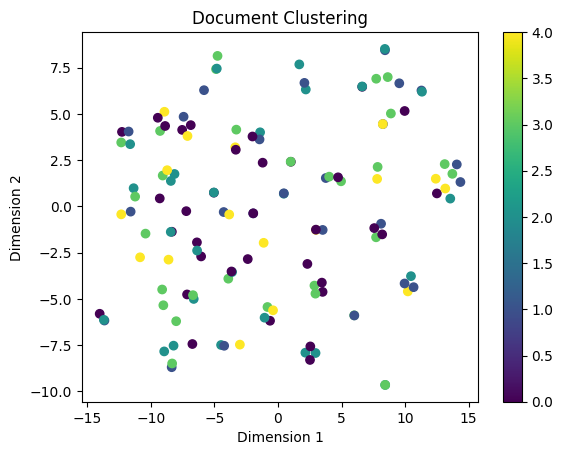

In [133]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert embeddings to a NumPy array
myembeddings_array = np.array(myembeddings)

# Visualize with t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(myembeddings_array)

# Example labels for visualization (create labels based on your use case, if applicable)
labels = np.random.randint(0, 5, size=len(myembeddings))  # Replace with your actual labels

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.title("Document Clustering")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming `query_embedding` is the embedding for your query
# and `myembeddings` is the NumPy array of document embeddings

# Convert document embeddings to a NumPy array if not already
document_embeddings = np.array(myembeddings)

# Example: A random query embedding (replace with your actual query embedding)
query_embedding = np.random.rand(document_embeddings.shape[1])

# Compute cosine similarity between the query and document embeddings
similarities = cosine_similarity([query_embedding], document_embeddings)[0]

# Get indices of top 3 similar documents
most_similar_indices = np.argsort(similarities)[::-1][:3]  # Sort descending and take top 3

# Fetch the top 3 similar documents
relevant_docs = [documents[i] for i in most_similar_indices]
combined_text = " ".join([doc.text for doc in relevant_docs])

# Print out the combined text
print("Combined text from top similar documents:")
print(combined_text)




Combined text from top similar documents:
UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549
FORM 10-Q
(Mark One)
☒  QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the quarterly period ended June 25, 2022
or
☐  TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from              to             .
Commission File Number: 001-36743
Apple Inc.
(Exact name of Registrant as specified in its charter)
California 94-2404110
(State or other jurisdictionof incorporation or organization) (I.R.S. Employer Identification No.)
One Apple Park Way
Cupertino, California 95014
(Address of principal executive offices) (Zip Code)
(408) 996-1010
(Registrant’s telephone number, including area code)
Securities registered pursuant to Section 12(b) of the Act:
Title of each class Trading symbol(s) Name of each exchange on which registered
Common Stock, $0.00001 par value per shareAAP